**Classfying Movie Reviews**

Binary classification of IMDB dataset

inputs 5O,OOO reviews

output : positive and negative

In [1]:
import tensorflow as tf
from keras.datasets import imdb

Using TensorFlow backend.


#### Data Prepration 

XT = Training data 

Xt = testing data

In [2]:
(XT,YT),(Xt,Yt) = imdb.load_data(num_words=10000)

In [3]:
len(XT),len(YT)

(25000, 25000)

In [4]:
print(XT[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
word_index=imdb.get_word_index()

In [6]:
#print(word_index.items())

To see what actually the review is we will create a reverse dictionary which maps the index with words , for that we use the dictionary constructor and use the list comprehension and we iterate over all of the above and make keys as values and values as keys so that we get a reverse lookup table

In [7]:
index_word = dict([value,keys] for (keys,value) in (word_index.items()))

In [8]:
#print(index_word.items())

The index that we are going to pass is index - 3  because when the vocab is created it also adds 3 words to it by default (pad word , start of sentence and the unknown word  therefore the index is shifted by 3 positions --- the get method is a method in dictionary which will return a hash if there is nothing corresponding to that index else it will return the value of that index 
 

In [9]:
actual_review = ' '.join([index_word.get(index-3,"_")for index in XT[15]])

In [10]:
actual_review

"_ a total waste of time just throw in a few explosions non stop fighting exotic cars a deranged millionaire slow motion computer generated car crashes and last but not least a hugh _ like character with wall to wall hot babes and mix in a _ and you will have this sorry excuse for a movie i really got a laugh out of the dr evil like heavily _ compound the plot was somewhere between preposterous and non existent how many _ are willing to make a 25 million dollar bet on a car race answer 4 but didn't they become _ through _ responsibility this was written for _ males it plays like a video game i did enjoy the _ ii landing in the desert though"

#### In the next step we will vectorize the data

Since the vocab size is 10,000 we will make sure that every sentence is represented by a vector of length 10,000 (it would be a collection of 0's and 1's) (000100111010011.....)

so the ith index will be set to 1 if there is a word in the sentence for that index otherwise it will be set to 0

now we will define a method which will accepts a list of sequences and makes a matrix out of them

In [11]:
import numpy as np 

def vectorize_sentence(sentences,dim=10000):
    outputs = np.zeros((len(sentences), dim))
    
    for i, index in  enumerate (sentences):
        outputs [i, index] = 1
        
    return outputs
    

In [12]:
X_train = vectorize_sentence(XT)
X_test = vectorize_sentence(Xt)

In [13]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
YT

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
Y_train = np.asarray(YT).astype("float32")
Y_test = np.asarray(Yt).astype("float32")

In [16]:
Y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

#### Build a network

Use fully connected /Dense layers with Relu activation
2 hidden layers with 16 unit each
1 output layer with 1 unit (Sigmoid Activation )
We have input data which is vectorized which will go through first dense layer containing 16 neurons and then through the second layer which contains 16 neurons and finally we will have the output with 1 unit with the sigmoid activation which will give us the probabilities in the range 0 and 1

In [84]:
from keras import models
from keras.layers import Dense

In [85]:
model = models.Sequential()
model.add(Dense(16, activation = "relu", input_shape=(10000,)))
model.add(Dense(16,activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

#### Compile the model

we have to specify the optimizer which is like the gradient descent and is used to update the weights

we also have to specify the loss

and the matrix to compare our performance for that we use the accuracy matrices

In [86]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics= ["accuracy"])


In [87]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


### Training and Validation

since the model has more number of parametere than the number of examples that we have in the training set, so model may overfit, in order to avoid overfit we need to have a validation set

so in total if we have 50k examples and out of those 50k examples we have just 25k in the training set so let's keep 5k examples as the validation set

so we are going to train over 20k examples and see the accuracy in the 5k validation set

When we see the graph we might see that the accuracy in the trianing set will increase continuously but the accuracy of the validation set starts to drop after a certain point so that is the point where we should stop our training because after this point the model tries to learn the examples, it tries to overfit which is not a good generalization and this is called early stopping

one way is whenever there is an increase in the validation accuracy we save our model the other way is to figure out the right number of iterations that we should do so that our model does not overfit

X_val will be a subset of our training set so we can take the first 5k examples

In [88]:
x_val = X_train[:5000]
x_train_new = X_train[5000:]

y_val = Y_train[:5000]
y_train_new = Y_train[5000:]

In [89]:
hist=model.fit(x_train_new,y_train_new,epochs=3,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 4s 186us/step - loss: 0.5624 - accuracy: 0.7839 - val_loss: 0.4189 - val_accuracy: 0.8618
Epoch 2/3
20000/20000 [==============================] - 3s 158us/step - loss: 0.3249 - accuracy: 0.8944 - val_loss: 0.3028 - val_accuracy: 0.8860
Epoch 3/3
20000/20000 [==============================] - 3s 154us/step - loss: 0.2246 - accuracy: 0.9261 - val_loss: 0.2743 - val_accuracy: 0.8936


In [90]:
import matplotlib.pyplot as plt

In [91]:
h = hist.history 

 hist is an object that contains one dictionary  by the name history which contains key acc, loss, validation_loss, accuracy_loss

### For 20 Epochs

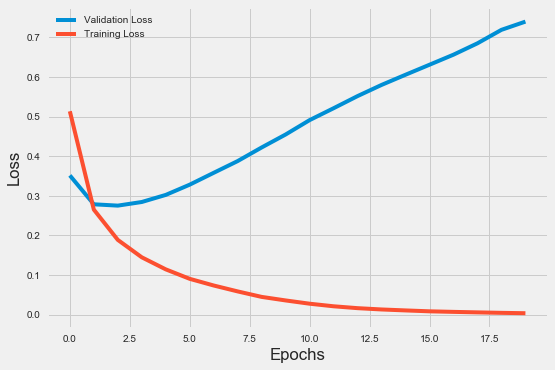

In [80]:
plt.style.use("fivethirtyeight")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.plot(h["loss"], label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The validation loss decreased for few epochs and increased after that, which means that we are doing overfitting

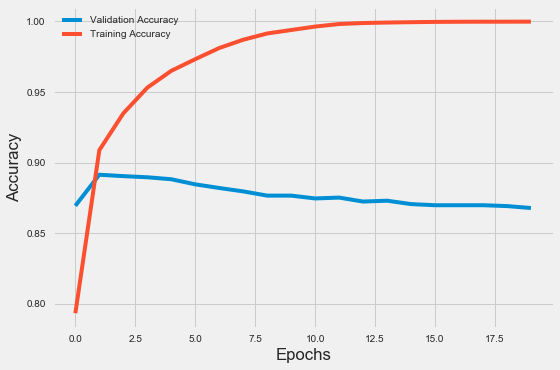

In [81]:
plt.style.use("fivethirtyeight")
plt.plot(h["val_accuracy"], label = "Validation Accuracy")
plt.plot(h["accuracy"], label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The validation accuracy is maximum at around 3 epochs after that it is decreasing. The training accuracy is almost 100 percent and validation accuracy  is close to 90% , so ideally we should stop our algorithm after 2 or 3 epochs (it is called early stopping)  so we will stop at 3 epochs because here epochs start from 0    

In [82]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 2s 97us/step


0.9734799861907959

In [83]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 3s 116us/step


0.8527600169181824

### For 3 Epochs

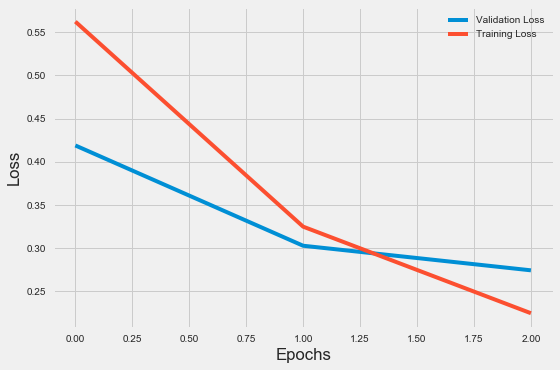

In [92]:
plt.style.use("fivethirtyeight")
plt.plot(h["val_loss"], label = "Validation Loss")
plt.plot(h["loss"], label = "Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

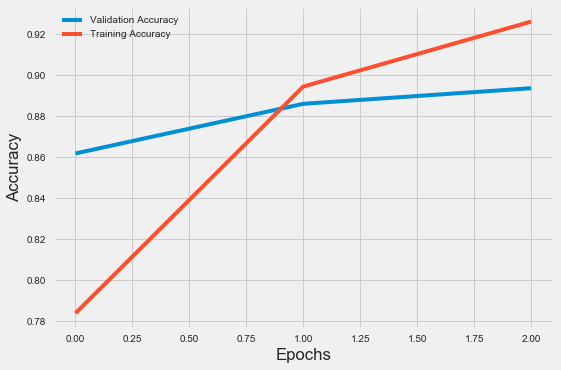

In [93]:
plt.style.use("fivethirtyeight")
plt.plot(h["val_accuracy"], label = "Validation Accuracy")
plt.plot(h["accuracy"], label = "Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [94]:
model.evaluate(X_train,Y_train)[1]

25000/25000 [==============================] - 3s 103us/step


0.9345999956130981

In [95]:
model.evaluate(X_test,Y_test)[1]

25000/25000 [==============================] - 3s 101us/step


0.8853600025177002

##### SO, the accuracy of the Sentiment analysis is 88%

In [28]:
h

{'val_loss': [0.40567239689826967,
  0.28633559184074403,
  0.2731936280250549,
  0.2839574966430664,
  0.3017891109466553,
  0.3272358145236969,
  0.3544104646205902,
  0.38246795358657837,
  0.41550102500915526,
  0.44687506365776064,
  0.47754859533309935,
  0.5104814436912537,
  0.537266846370697,
  0.5593465650558471,
  0.597886037158966,
  0.6115595079421997,
  0.6389712580680847,
  0.6592774286270141,
  0.6766213706970214,
  0.6914048450469971],
 'val_accuracy': [0.8722000122070312,
  0.8931999802589417,
  0.8912000060081482,
  0.8907999992370605,
  0.8877999782562256,
  0.8831999897956848,
  0.8805999755859375,
  0.879800021648407,
  0.8769999742507935,
  0.8744000196456909,
  0.8733999729156494,
  0.8715999722480774,
  0.8694000244140625,
  0.8694000244140625,
  0.8682000041007996,
  0.8676000237464905,
  0.8654000163078308,
  0.8651999831199646,
  0.8658000230789185,
  0.8651999831199646],
 'loss': [0.558279031085968,
  0.29979882872104646,
  0.1969336642742157,
  0.151084316